In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("../data/data_train.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 20, 30],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=5)

search.fit(X_train, y_train)
best_params = search.best_params_
model_tuned = RandomForestClassifier(**best_params)
model_tuned.fit(X_train, y_train)

with open("random-forest.pkl", "wb") as handle:
    pickle.dump(model_tuned, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model_tuned.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model_tuned.feature_importances_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights,
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print("Top 20 features:")
print(feature_weights_mapping)


/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

Accuracy: 97.91% (0.9790682526041524)
Top 20 features:
             feature    weight
109  events_last_24h  0.220762
2      hour_datetime  0.154731
3          hour_temp  0.114761
6       hour_winddir  0.103124
5     hour_windspeed  0.091840
7    hour_cloudcover  0.072676
0               city  0.067497
1       day_datetime  0.026454
8    hour_conditions  0.021401
4        hour_precip  0.009460
10           chernih  0.002740
94              auth  0.002325
70               lnr  0.002275
62               mas  0.002157
87             settl  0.002123
49             sourc  0.001954
19            encirc  0.001915
42           kremlin  0.001890
95         southeast  0.001794
37          reinforc  0.001791


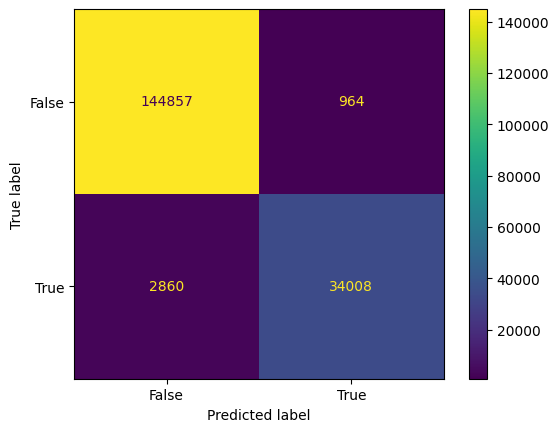

In [6]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tuned.classes_)
disp.plot()
plt.show()